# Exercise Session -  Support Vector Machine (SVM)

Welcome to the 6th excersie session of CS233 - Introduction to Machine Learning.  

We will use Scikit-learn, a Python package of machine learning methods, in this exercise. We are going to start with a toy binary classification example to understand Linear SVM, then to address more difficult problem. 


In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%load_ext autoreload
%autoreload 2

# 1 Support Vector Machine (SVM)
SVM tries to solve linear classification problem of the **primal form**:  
    \begin{align}
       \mathbf{w}^* = \underset{\tilde{\mathbf{w}},\{\xi_n\}}{\operatorname{min}}  \ \ & \frac{1}{2}\|\tilde{\mathbf{w}}\|^2 + C \sum^N_{n=1}\xi_n \\
        \operatorname{subject \  to} \ \ &  t_n\cdot(\tilde{\mathbf{w}}\cdot\mathbf{x_n}) \geq 1-\xi_n , \forall \ n \\
                          &\text{and  }\  \xi_n \geq 0 , \forall \  n
    \end{align}
where, $\tilde{\mathbf{w}}$ are the weights, $x_n$ is a data sample and $t_n$ is a label.


**Q**: How is $\tilde{\mathbf{w}}$ related to margin width? What does minimizing $\tilde{\mathbf{w}}$ mean? 
*It is equivalent to maximize the distance between the boundary and the closest point to the boundary.*

**Q**: What is C? What How should we choose the best value for C? *It rules how we penalize the missclassified or inside the margin values*

**Q**: What does it mean when $\xi_n \gt 0$ ? *Our values are inside the margines (correctly or not classified)*



# 2 Find the Margins

We learn a hard-margin (i.e., no misclassification allowed) linear SVM classifier for the data samples shown in the figure below. Answer the following questions
1. What is the equation for the decision boundary, in terms of $x_1$ and $x_2$? *eq = -x + y = 0*

2. How many support vectors are there? Write down their coordinates. *2 support vectors (2,4) y (4,2)*

3. What are the weights (including the bias term) for the SVM formulation? *w = [0,1,1]*

4. If we learn a soft-margin (with slack variables) linear SVM classifier, then what can be the maximum and the minimum number of support vectors?

<img src="svm_full_text.png" width="500">

# 3 Scikit-Learn

Training a SVM classifer is not a easy task, so in this session, we are going to use Scikit-Learn, which is a machine learning library written in python. Most of the machine learning algorithms and tools are already implemented. In this exercise, we'll use this package to train and understand SVM. If you are interested in how to optimize a SVM, you can refer to [this](https://xavierbourretsicotte.github.io/SVM_implementation.html).

Please install scikit-learn in your conda environment by following instructions at this link:https://scikit-learn.org/stable/install.html if you don't have it.

Scikit-Learn has modules implemented broadly for 
- Data Transformations: https://scikit-learn.org/stable/data_transforms.html
- Model Selection and Training: https://scikit-learn.org/stable/model_selection.html
- Supervised Techniques: https://scikit-learn.org/stable/supervised_learning.html
- Unsupervised Techniques: https://scikit-learn.org/stable/unsupervised_learning.html

All the magic happens under the hood, but gives you freedom to try out more complicated stuff.  
Different methods to be noted here are
- `fit`: Train a model with the data
- `predict`: Use the model to predict on test data
- `score`: Return mean accuracy on the given test data

Have a look at [this](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting) for simple example.

We will explore linear SVM in this session: [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) with linear kernel. 

# 4 Binary Classification

Let's begin with a simple **binary** classification using Linear SVM.
The data is simply **linearly** separable.

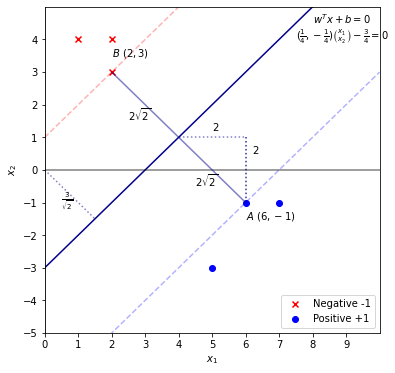

In [2]:
# Simple data
from plots import plot_simple_data
x = np.array([[2,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
y = np.array([-1,-1, -1, 1, 1 , 1 ])
plot_simple_data()

### 4.1 Linear SVM
In this part, you are asked to build a SVM classifier using SVC and to understand the outputs from the fitted model.

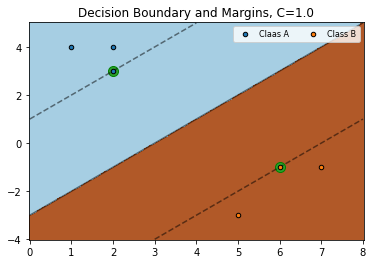

w =  [[ 0.25 -0.25]]
w0 =  [-0.75]
Number of support vectors for each class =  [1 1]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Indices of support vectors =  [2 3]


In [3]:
# Let use SVC with linear kernel
from sklearn.svm import SVC
from plots import plot


# 1. Declare a SVC with C=1.0 and kernel='linear'
## CODE HERE
clf = SVC(C=1.0,kernel='linear')

# 2. use x and y to fit the model
## CODE HERE
clf.fit(x,y)
 

# 3. show the fitted model
plot(x, y, clf)

print('w = ',clf.coef_)
print('w0 = ',clf.intercept_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Support vectors = ', clf.support_vectors_)
print('Indices of support vectors = ', clf.support_)

In this case, we found that we have 2 **support vectors**, one in each class. They are shown highlighed in green in the plot. A support vector is a data sample that is either on the margin or within the margin. 

Let's inspect the result of the classification. We do the classification in the following way:

$$ 
t_i = \begin{cases}
-1 & \mathbf{x}_i^T \mathbf{w} + w_0 < 0\\
1 & \text{otherwise}
\end{cases}
$$

In [28]:
# Use the weights (w) from the fitted model to predict the labels of input data points

def raw_predict(x, w, w0):
    '''
    given input data, w and w0, output the prediction result
    
    input:
    x: data, np.array of shape (N, D) where N is the number of datapoints and D is the dimension of features.
    w: weights, np.array of shape (D,)
    w0: bias, np.array of shape (1,)
    
    output:
    out: predictions, np.array of shape (N, ). tip: .astype(int) 
    '''
    ## CODE HERE
    out = np.array(w0 + w @ x)
    out[out < 0] = -1
    out[out >= 0] = 1
    return out

x_test = np.array([
    [4, 2],
    [ 6, -3]])

#output the predictions on x_test
## CODE HERE
raw_pred = raw_predict(x_test,clf.coef_,clf.intercept_)
print("Prediction from your implementation: ", raw_pred)

##CODE HERE. Use scikit-learn's predict function to do the prediction on the test data.
model_predict = clf.predict(x_test)

print("Prediction from the model: ", model_predict)


assert(raw_pred.all() == clf.predict(x_test).all())


Prediction from your implementation:  [[-1.  1.]]
Prediction from the model:  [-1  1]


Now, let us determine the indices of the support vectors. (Reminder: These are the data samples that fall on the margin or within the margin). 

In [58]:
decision_function

array([-1.25, -1.5 , -1.  ,  1.  ,  1.25,  1.25])

In [61]:
clf.support_

array([2, 3])

In [68]:
## we can also calculate the decision function manually
## Step 1: CODE HERE:: Code the decision function: Xw+w_0
decision_function = clf.intercept_ + x @ clf.coef_.reshape(2)

## Step 2: We can also retrieve the decision function from the model:
decision_function_from_model = clf.decision_function(x)

assert(decision_function_from_model.all() == decision_function.all())

## according to the condition that support vectors should satisfy
## CODE HERE tips: use np.where to put the condition in.
support_vector_indices = np.where(np.absolute(decision_function) == 1)

print('I find the indices of support vectors = ', support_vector_indices)
assert(support_vector_indices[0].all() == clf.support_.all())

I find the indices of support vectors =  (array([2, 3], dtype=int64),)


### 4.2 Different C values
Let's try different values of C. In the code, vary the C value from 0.001 to 100 and notice the changes on a bigger dataset.  
**Question**: How does the margin vary with C? **Hint**: have a look at the optimization formulation above.
*The increase of C implies a bigger penalization for the epsilon values > 0, so it implies also that the decision boundary will be closer to the support vectors*

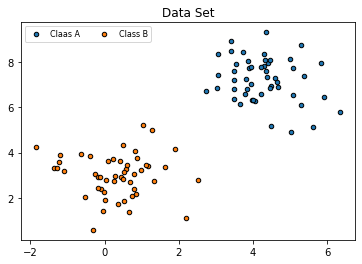

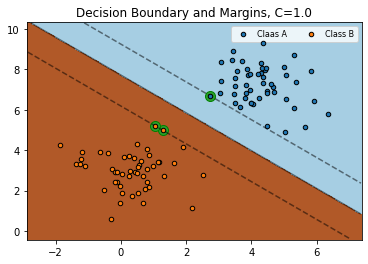

In [69]:
from sklearn.svm import SVC
from helpers import get_simple_dataset
from plots import plot

# Get the simple dataset
X, Y = get_simple_dataset()
plot(X,Y,None,dataOnly=True)

#Declare a SVM model with linear kernel and C=1.0
clf = SVC(kernel='linear', C=1.0)

#call the fit method
clf.fit(X, Y)

#plot the decision boundary
plot(X, Y, clf)


The above plot shows the decision boundary and margins of the learnt model. Encircled points are the support vectors.  
WARNING: if the margins go beyound the limits of axis, they are not shown or shown close to decision plane. 

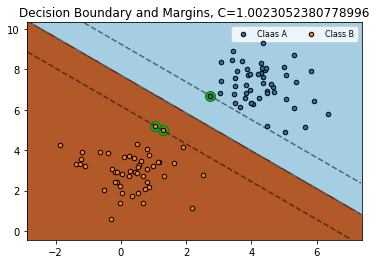

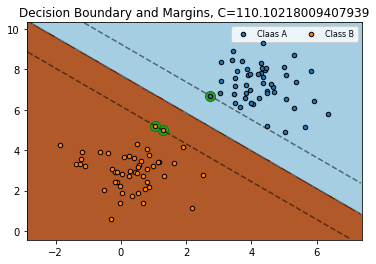

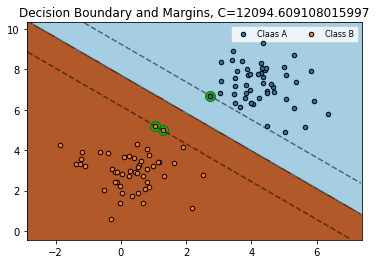

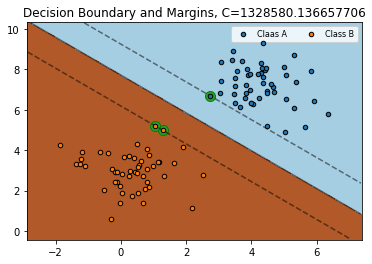

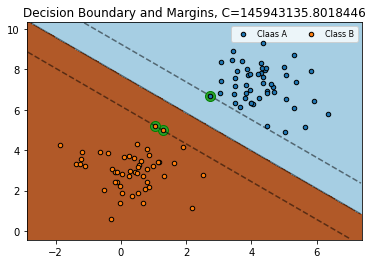

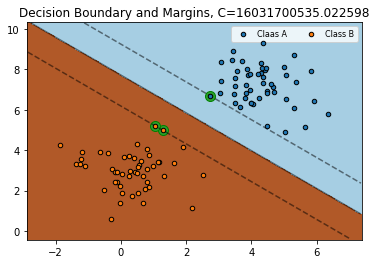

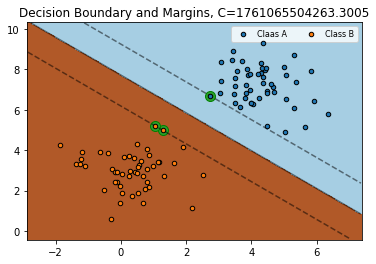

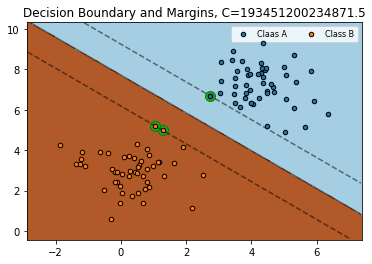

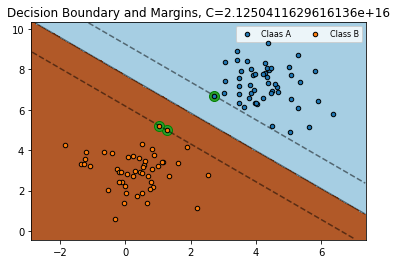

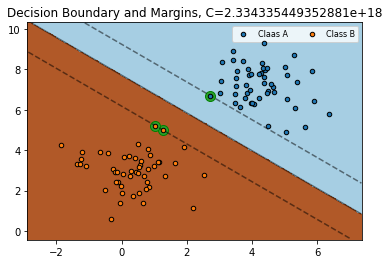

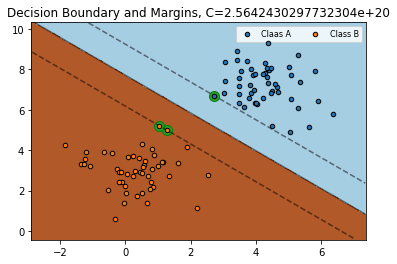

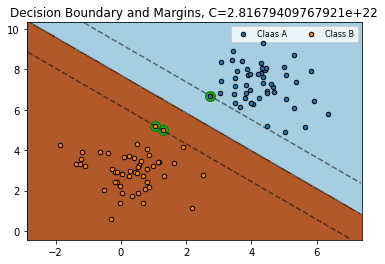

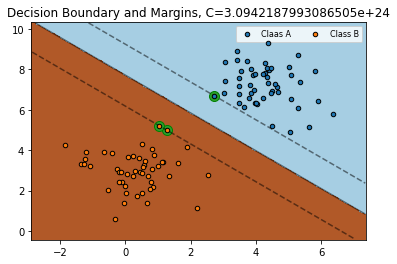

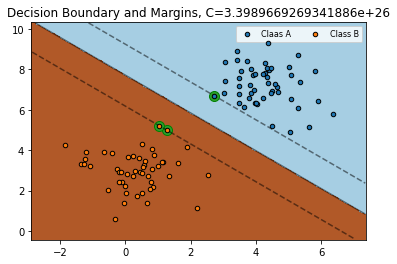

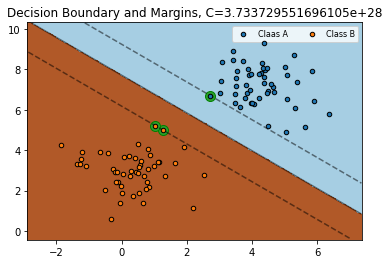

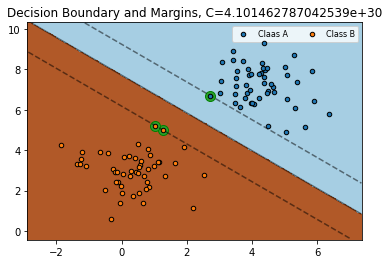

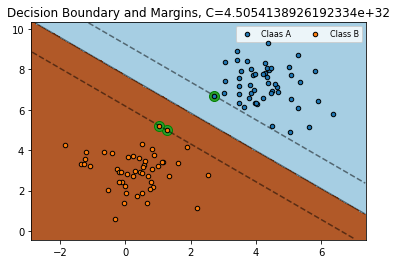

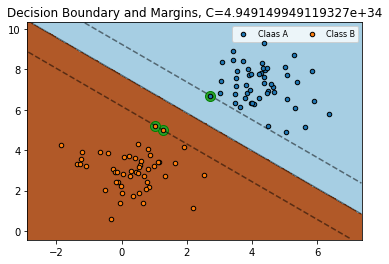

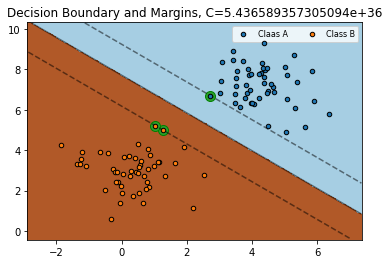

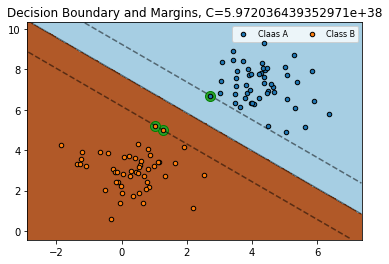

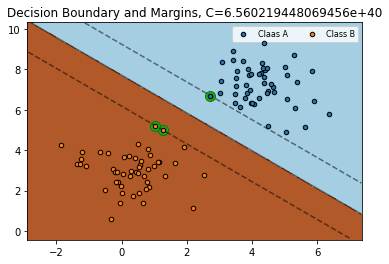

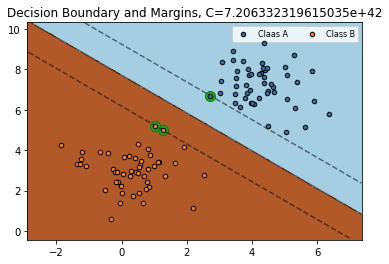

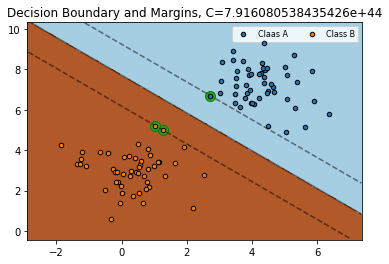

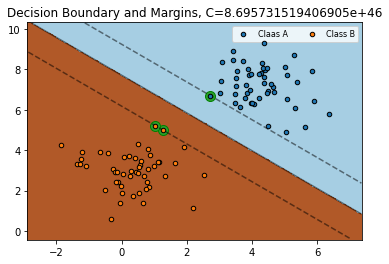

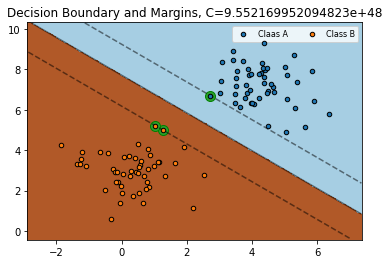

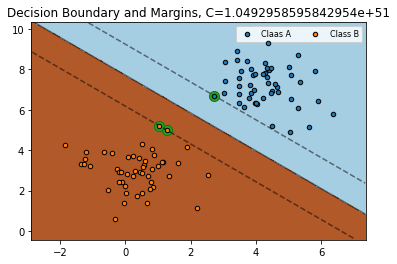

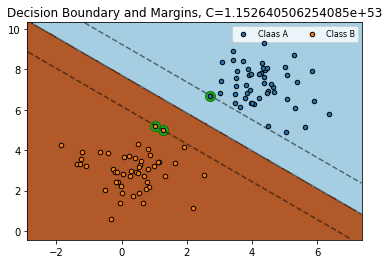

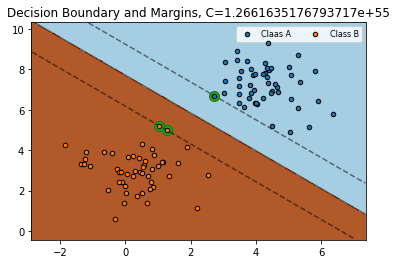

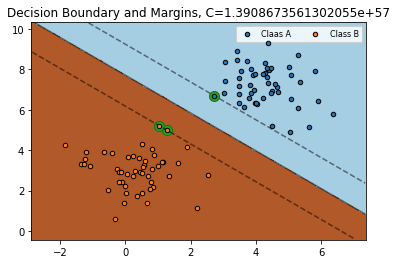

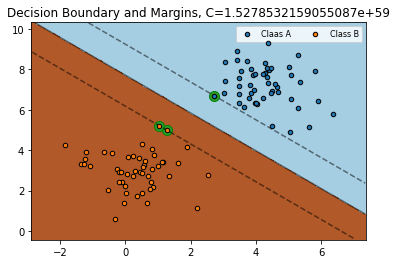

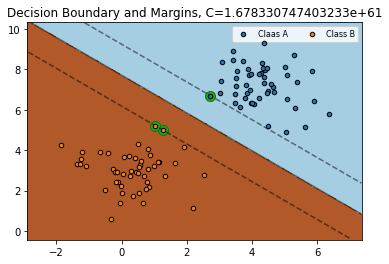

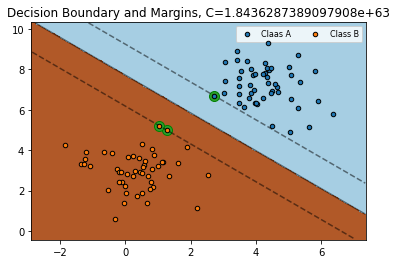

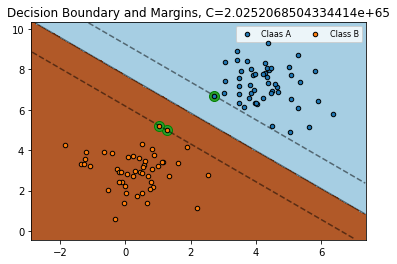

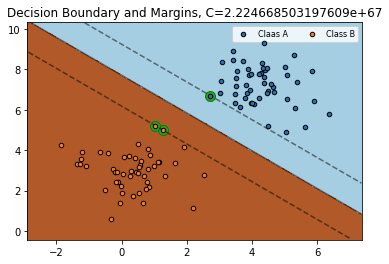

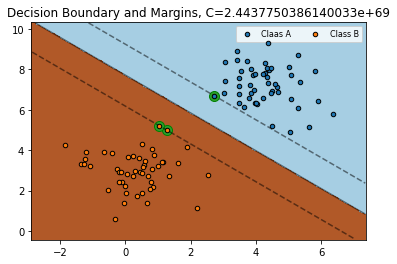

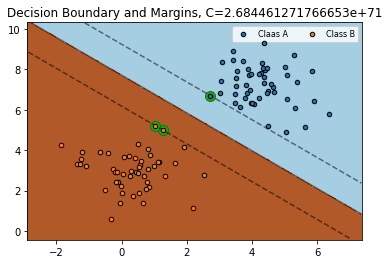

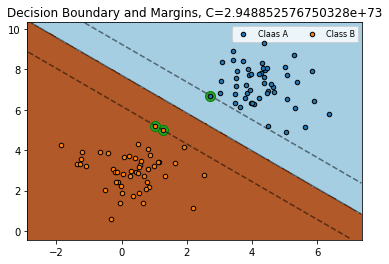

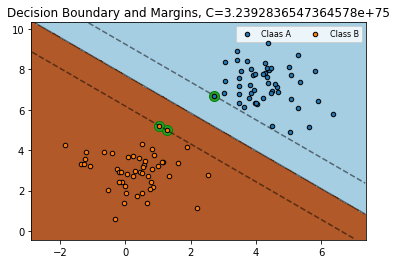

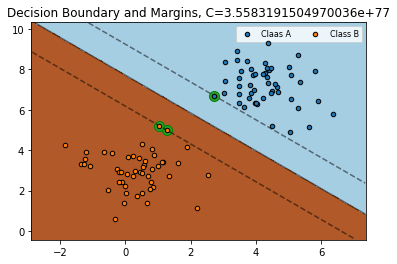

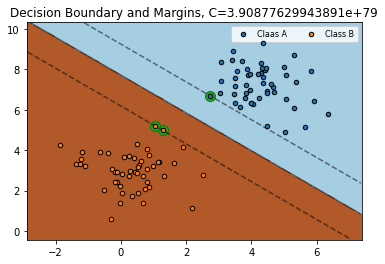

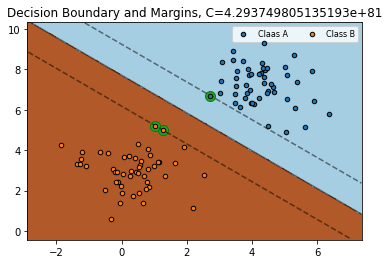

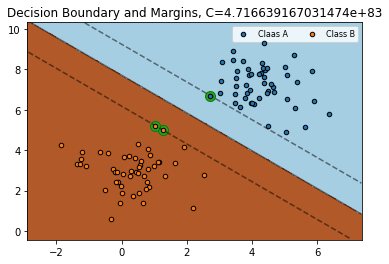

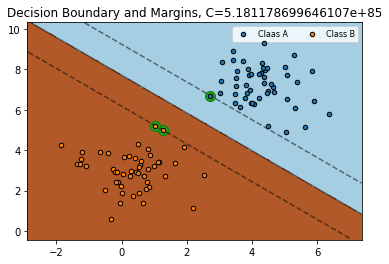

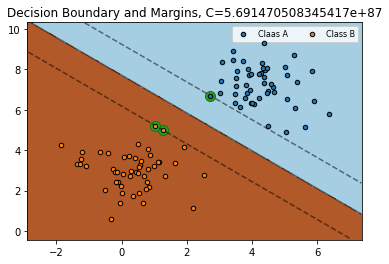

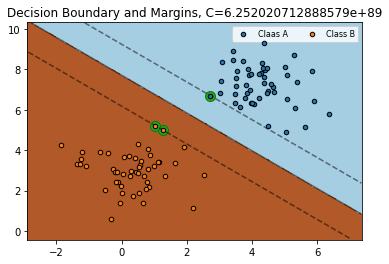

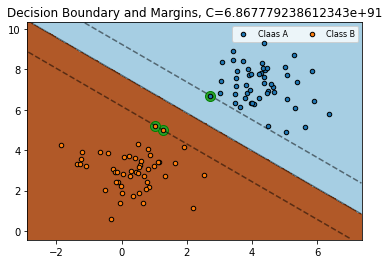

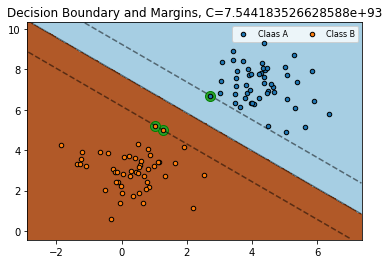

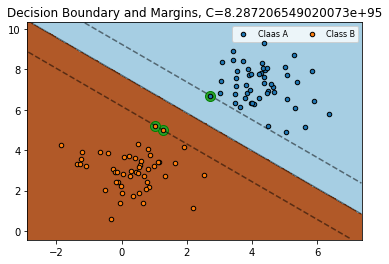

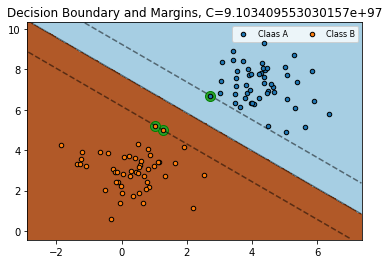

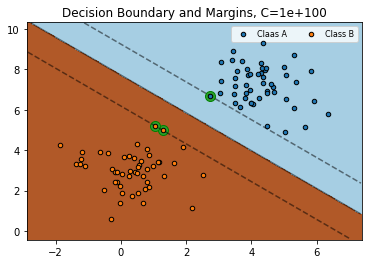

In [71]:
# Vary C and plot the boundaries
# Use np.logspace to generate 6 c values from (1e-3, 1e2) 
## CODE HERE 

C = np.logspace(1e-3,1e2)

for c in C:
    clf = SVC(kernel='linear', C=c)
    clf.fit(X, Y)
    plot(X, Y, clf)
 

### Additional Reading (if interested)
- Multiclass SVM (Bishop- Multiclass SVMs 7.1.3)
- Can we have probabilistic interpretation of SVM? (Bishop- Relevance Support Machine 7.2)